In [1]:
import fastf1 as ff1
from fastf1 import plotting
from matplotlib import pyplot as plt

plotting.setup_mpl()

In [2]:
session = ff1.get_session(2023, 'Mexico', 'Q')
session.load()

api         WARNING 	

NO CACHE! Api caching has not been enabled! 
	It is highly recommended to enable this feature for much faster data loading!
	Use `fastf1.Cache.enable_cache('path/to/cache/')`

core           INFO 	Loading data for Mexico City Grand Prix - Qualifying [v2.3.0]
api            INFO 	Fetching driver list...
core        WARNING 	Failed to load data from Ergast API! (This is expected for recent sessions)
api            INFO 	Fetching timing data...
api            INFO 	Parsing timing data...
api            INFO 	Fetching timing app data...
core           INFO 	Processing timing data...
api            INFO 	Fetching session status data...
api            INFO 	Fetching track status data...
api            INFO 	Fetching car data...
api            INFO 	Parsing car data...
api            INFO 	Fetching position data...
api            INFO 	Parsing position data...
api            INFO 	Fetching weather data...
api            INFO 	Fetching race control messages...
core      

In [3]:
lec_lap = session.laps.pick_driver('LEC').pick_fastest()
sai_lap = session.laps.pick_driver('SAI').pick_fastest()
ver_lap = session.laps.pick_driver('VER').pick_fastest()

lec_lap = lec_lap.get_car_data().add_distance()
sai_lap = sai_lap.get_car_data().add_distance()
ver_lap = ver_lap.get_car_data().add_distance()

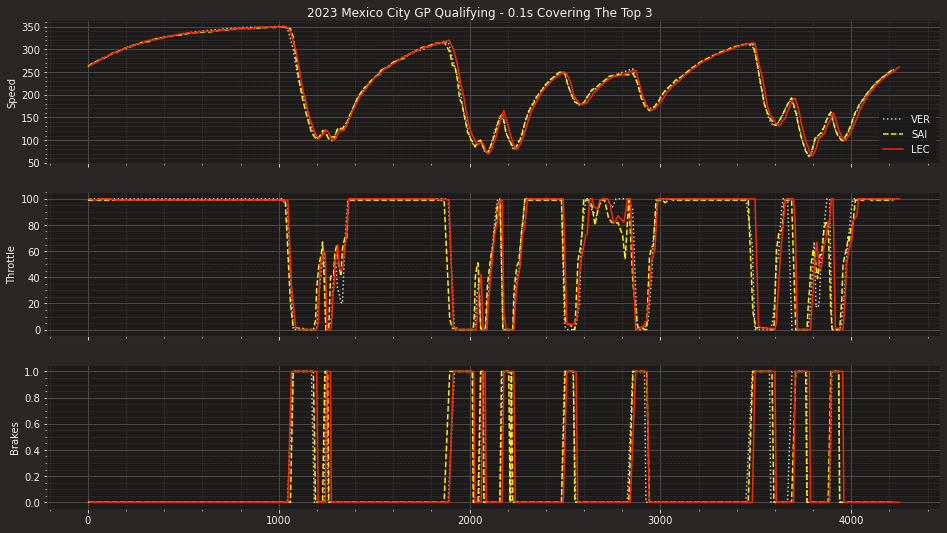

In [5]:
fig, ax = plt.subplots(3, figsize = (16, 9))
fig.suptitle("2023 Mexico City GP Qualifying - 0.1s Covering The Top 3", y=0.9)

ax[0].plot(ver_lap['Distance'], ver_lap['Speed'], color='#CCCCCC', linestyle = 'dotted', label='VER')
ax[0].plot(sai_lap['Distance'], sai_lap['Speed'], color='#FFF200', linestyle = 'dashed', label='SAI')
ax[0].plot(lec_lap['Distance'], lec_lap['Speed'], color='#FF2400', label='LEC')
ax[0].set(ylabel='Speed')
ax[0].legend(loc="lower right")

ax[1].plot(ver_lap['Distance'], ver_lap['Throttle'], color='#CCCCCC', linestyle = 'dotted', label='VER')
ax[1].plot(sai_lap['Distance'], sai_lap['Throttle'], color='#FFF200', linestyle = 'dashed', label='SAI')
ax[1].plot(lec_lap['Distance'], lec_lap['Throttle'], color='#FF2400', label='LEC')
ax[1].set(ylabel='Throttle')

ax[2].plot(ver_lap['Distance'], ver_lap['Brake'], color='#CCCCCC', linestyle = 'dotted', label='VER')
ax[2].plot(sai_lap['Distance'], sai_lap['Brake'], color='#FFF200', linestyle = 'dashed', label='SAI')
ax[2].plot(lec_lap['Distance'], lec_lap['Brake'], color='#FF2400', label='LEC')
ax[2].set(ylabel='Brakes')

for a in ax.flat:
    a.label_outer()
    
plt.show()

In [6]:
fig.savefig('2023 Mexico City GP - LEC vs SAI vs VER.png', dpi = 600)